In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux import *

In [2]:
filename = './dl2_gamma-diffuse_testing.h5'

In [3]:
sim = simulation_object(filename)

In [4]:
src = source_object(tobs=60*u.min)

In [5]:
obs = observation(sim, src)

## Spatial Weights

In [6]:
src_disk = source_object(tobs=60*u.min, shape="disk")
src_ring = source_object(tobs=60*u.min, rmin = 0.5)
src_gauss = source_object(tobs=60*u.min, shape="gaussian")

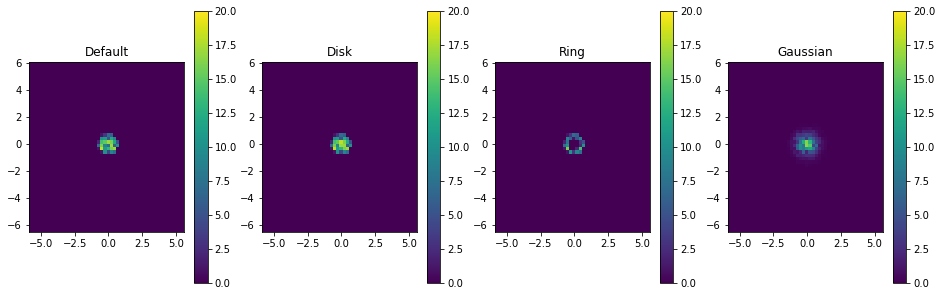

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_disk.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_ring.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_gauss.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(60*u.min, spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(tobs=60*u.min, spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

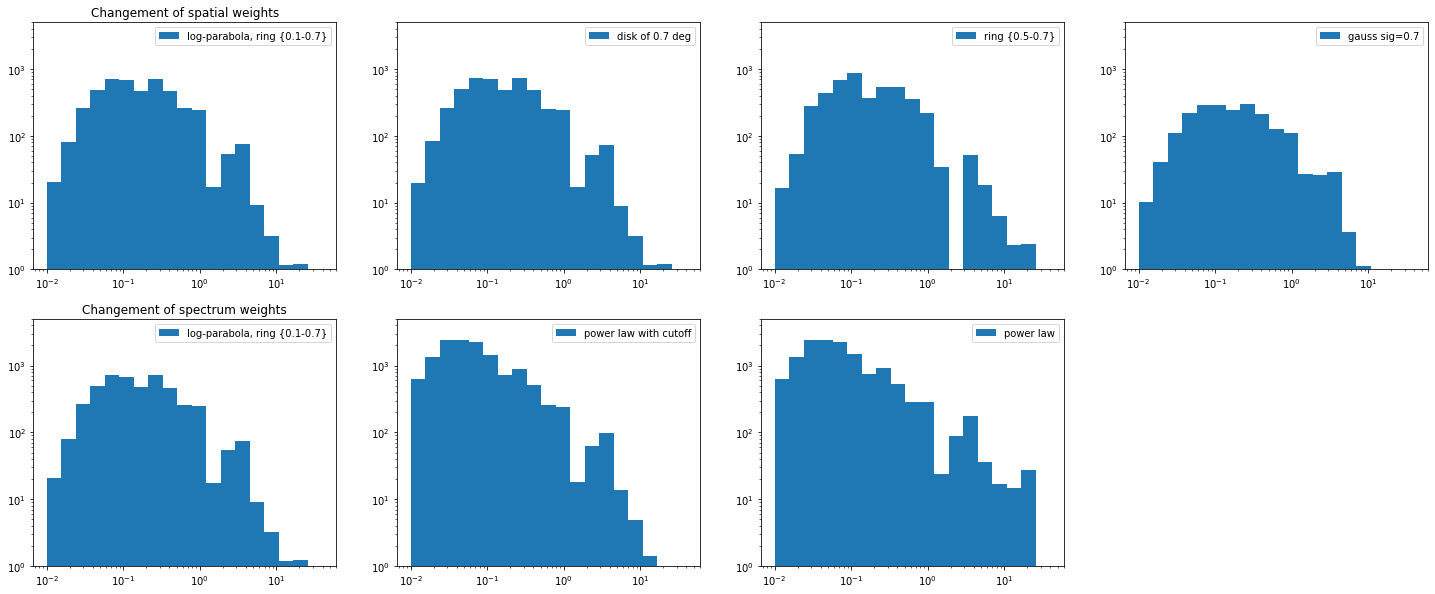

In [9]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_disk.weighting(),
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_ring.weighting(),
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_gauss.weighting(),
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_cutoff.weighting(),
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_powerlaw.weighting(),
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();


In [10]:
obs.final_sim()

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
3568,1016,448507,1543.312927,3.188454,0.190094,0.189516,0.268425,0.783877,0.261100,0.004319,...,-0.247044,-0.334625,-0.056950,-0.145109,0.202729,0.717983,1.219660,3.126525,0,0.893833
59,1001,370708,43.089668,1.634373,-0.425392,-0.063314,0.430078,-2.993841,0.074595,0.004181,...,0.408577,0.196092,-0.016815,0.132778,14.382119,0.193742,1.221099,3.155434,101,0.489405
2875,1012,1570508,31.594662,1.499614,-0.022439,0.512021,0.512512,1.614593,0.065842,0.005274,...,-0.203852,-0.592197,-0.226291,-0.080176,2.476051,-0.003639,1.213638,3.133403,101,0.361333
447,1001,2705802,50.471315,1.703045,-0.203867,-0.517862,0.556545,-1.945835,0.064216,0.005208,...,0.006052,0.370971,-0.197815,-0.146891,-1.747162,0.479033,1.214629,3.126547,101,0.324667
2993,1012,2235901,189.248425,2.277032,-0.354744,0.637708,0.729736,2.078448,0.228799,0.007986,...,0.142213,-0.803244,-0.212532,-0.165536,12.125037,-0.208994,1.214093,3.124662,0,0.810833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,1012,2754207,282.686043,2.451304,-0.123543,0.033793,0.128081,2.874591,0.085557,0.003547,...,0.170903,-0.142133,0.047360,-0.108340,2.682008,0.481620,1.223401,3.130227,101,0.249167
950,1002,390706,93.529153,1.970947,0.486227,0.140418,0.506097,0.281142,0.095146,0.004907,...,-0.255359,-0.155284,0.230868,-0.014866,1.064786,-0.111104,1.229975,3.140004,101,0.213000
1702,1002,4720704,896.623665,2.952610,-0.314640,-0.612326,0.688434,-2.045458,0.315303,0.007855,...,0.483218,0.413852,0.168577,-0.198473,7.669099,0.844089,1.227681,3.120522,0,0.757667
2895,1012,1688504,253.458240,2.403906,0.378481,-0.284057,0.473220,-0.643833,0.114556,0.003929,...,-0.479362,0.139594,-0.100881,-0.144463,11.350849,-0.240024,1.218091,3.126657,0,0.761833


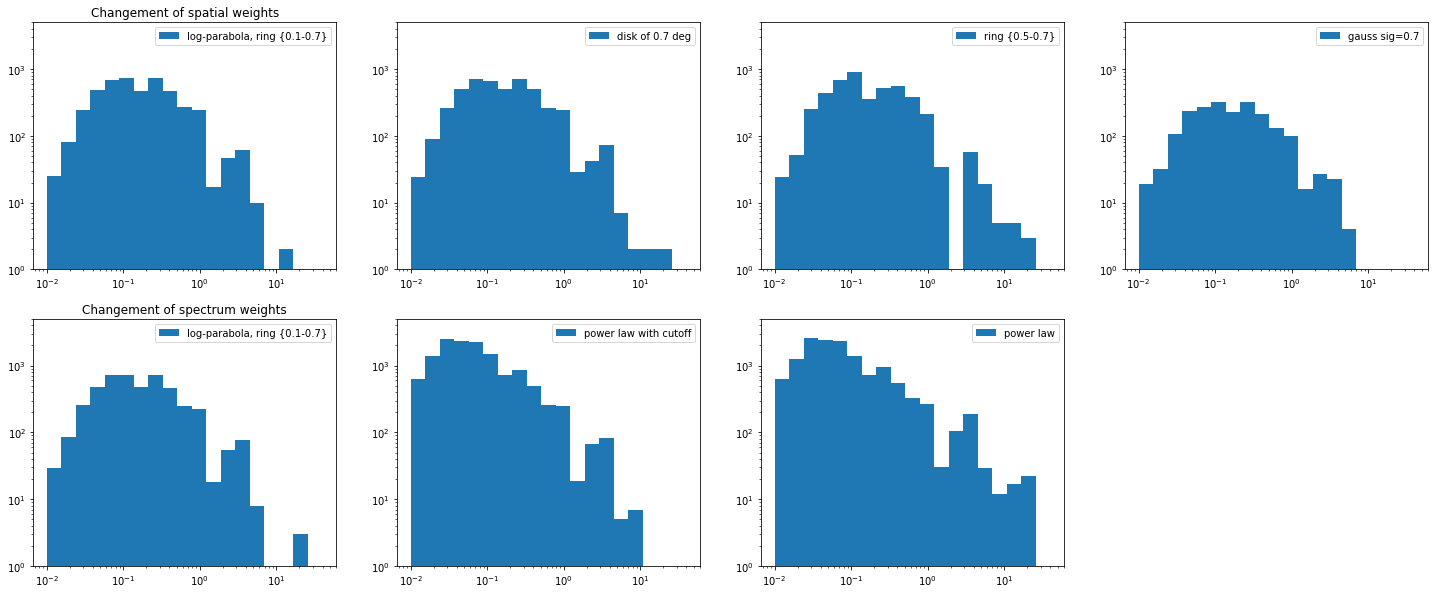

In [11]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();

